# Tutorial 06: Computing energy term properties

Sometimes it is necessary to compute the certain properties of energy terms, such as energy, effective field, or energy density, without driving the system and updating magnetisation field.

In [21]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
%matplotlib inline

We define the cube mesh with edge length $10 \,\text{nm}$ and cell discretisation edge $1 \,\text{nm}$.

In [22]:
region = df.Region(p1=(0, 0, 0), p2=(10e-9, 10e-9, 10e-9))
mesh = df.Mesh(region=region, n=(10, 10, 10))
mesh.k3d()

Output()

Now we define the system object and its energy equation.

In [23]:
system = mm.System(name='system')

A = 1e-11
H = (0.1/mm.consts.mu0, 0, 0)
K = 1e3
u = (1, 1, 1)
system.energy = mm.Exchange(A=A) + \
                mm.Demag() + \
                mm.Zeeman(H=H) + \
                mm.UniaxialAnisotropy(K=K, u=u)

system.energy

Exchange(A=1e-11) + Demag() + Zeeman(H=(79577.47154594767, 0, 0)) + UniaxialAnisotropy(K=1000.0, u=(1, 1, 1))

We will now intialise the magnetisation in $(0, 0, 1)$ direction and relax the magnetisation.

In [24]:
Ms = 8e5
system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=Ms)

Total effective field is:

Running OOMMF (ExeOOMMFRunner) [2020/05/04 09:04]... (1.8 s)


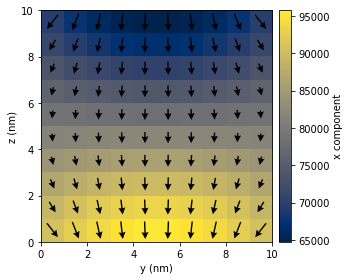

In [25]:
Heff = oc.compute(system.energy.effective_field, system)
Heff.plane('x').mpl()

Similarly, the effective field of an energy term is:

In [26]:
Hex_eff = oc.compute(system.energy.exchange.effective_field, system)

Running OOMMF (ExeOOMMFRunner) [2020/05/04 09:04]... (1.8 s)


Because we initialised the system with the uniform state, we expect this effective field to be zero.

In [27]:
Hex_eff.average

(0.0, 0.0, 0.0)

Similarly, the energy is:

In [28]:
E = oc.compute(system.energy.energy, system)
print(f'The energy of the system is {E} J.')

Running OOMMF (ExeOOMMFRunner) [2020/05/04 09:04]... (1.8 s)
The energy of the system is 1.3470795322e-19 J.


Now, we can relax the system.

In [29]:
md = oc.MinDriver()
md.drive(system)

Running OOMMF (ExeOOMMFRunner) [2020/05/04 09:04]... (1.9 s)


If we now compute the energy, we can show that the energy decreased:

In [30]:
E = oc.compute(system.energy.energy, system)
print(f'The energy of the system is {E} J.')

Running OOMMF (ExeOOMMFRunner) [2020/05/04 09:04]... (1.7 s)
The energy of the system is 5.35285533145e-20 J.


The relaxed magnetisation is:

In [31]:
system.m.plane('x').mpl()

The exchange energy is:

In [32]:
oc.compute(system.energy.exchange.energy, system)

Running OOMMF (ExeOOMMFRunner) [2020/05/04 09:04]... (1.7 s)


1.12170206436e-21

We can also check the sum of all individual energy terms and check if it the same as the total energy.

In [33]:
total_energy = 0
for term in system.energy:
    total_energy += oc.compute(term.energy, system)
    
print(f'The sum of energy terms is {total_energy} J.')
print(f'The energy of the system is {oc.compute(system.energy.energy, system)} J.')

Running OOMMF (ExeOOMMFRunner) [2020/05/04 09:04]... (1.9 s)
Running OOMMF (ExeOOMMFRunner) [2020/05/04 09:04]... (1.7 s)
Running OOMMF (ExeOOMMFRunner) [2020/05/04 09:04]... (1.7 s)
Running OOMMF (ExeOOMMFRunner) [2020/05/04 09:04]... (1.7 s)
The sum of energy terms is 5.352855331433802e-20 J.
Running OOMMF (ExeOOMMFRunner) [2020/05/04 09:04]... (1.7 s)
The energy of the system is 5.35285533145e-20 J.


In a similar way, energy density (scalar field) can be computed.

Running OOMMF (ExeOOMMFRunner) [2020/05/04 09:04]... (1.7 s)


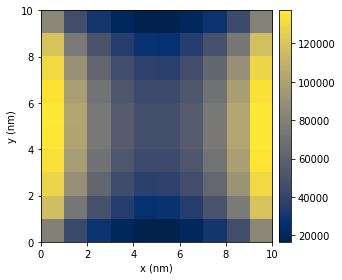

In [34]:
oc.compute(system.energy.density, system).plane('z').mpl()

In [35]:
oc.compute(system.energy.exchange.density, system).plane('z').mpl()

Running OOMMF (ExeOOMMFRunner) [2020/05/04 09:04]... (1.9 s)
